In [21]:
import numpy as np 
import pandas as pd 
from sklearn.cluster import DBSCAN 

POINTS_NUM_PER_TR = 500

In [28]:
df1 = pd.read_csv('resample_node1.csv')
df2 = pd.read_csv('resample_node2.csv')
df3 = pd.read_csv('resample_node3.csv')
arr1 = np.array(df1)
arr2 = np.array(df2)
arr3 = np.array(df3)

arr_all = np.append(arr1,arr2,axis = 0)
arr_all = np.append(arr_all,arr3,axis = 0)

df = pd.DataFrame(arr_all,columns = ['person_id','x','y'])
len(df)

484000

In [30]:
# 将数据以 ndarray 的形式读入内存
# [[x1,x2,...,x500,y1,y2,...,y500],[],...]
i = 0
data = np.array([])
while i <= length-1:
    arr_x = np.array(df['x'][i:i+POINTS_NUM_PER_TR])
    arr_y = np.array(df['y'][i:i+POINTS_NUM_PER_TR])
    arr = np.append(arr_x,arr_y)
    if len(data)==0:
        data = np.array([arr])
    else:
        data = np.append(data,[arr],axis=0)
    i+=500

In [31]:
# 确保定义的距离是有效的，非负性，同一性，对称性，直递性（三角不等式）

def dist(tr1,tr2):
    length = len(tr1)
    half = int(length/2)
    x1 = tr1[0:half]
    y1 = tr1[half:]
    x2 = tr2[0:half]
    y2 = tr2[half:]
    length = len(x1)
    deta_x = x1 - x2
    deta_y = y1 - y2
    distance = np.sum((deta_x**2 + deta_y**2) ** 0.5) / length
    # print(distance)
    return distance

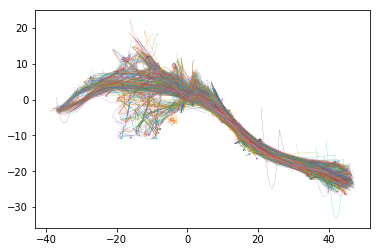

In [32]:
# 轨迹可视化
import matplotlib.pyplot as plt

tr_num = length//POINTS_NUM_PER_TR
for i in np.arange(tr_num):
    x = data[i][:POINTS_NUM_PER_TR]
    y = data[i][POINTS_NUM_PER_TR:]
    plt.plot(x,y,linewidth=0.2)
plt.show()

In [33]:
# eps 设定

EPS = 4.78

In [34]:
# 设定 MIN_SAMPLES
MIN_SAMPLES = 3

In [35]:
clustering = DBSCAN(eps=EPS, min_samples=MIN_SAMPLES,metric=dist).fit(data)

In [36]:
clustering.labels_

array([ 0,  0,  1,  0,  0,  1,  1,  1,  1,  1,  0,  1, -1,  1,  1,  0,  0,
        2,  1,  0,  0,  1,  0,  1,  9,  1,  1,  1,  1,  1,  1, -1,  0,  1,
        3,  0,  1,  0,  0,  1,  1,  1,  1,  0,  0,  0,  0,  0,  1,  0,  0,
        0,  0,  1,  1,  1,  1,  0,  0,  0,  0,  1,  4,  0,  1,  0,  1,  0,
        0,  1,  1,  1,  0,  1, -1,  1,  0,  1,  1,  0,  1,  0,  1,  0,  0,
       -1,  0,  0,  0,  1,  1, -1, -1,  1, -1, -1,  1,  1,  0,  1,  1,  1,
        0,  0,  1,  1,  1,  0,  1,  1,  1,  1, -1,  0,  0,  1,  0,  1,  1,
        1,  1,  0,  1,  1,  1,  0,  1, -1, -1,  1,  1,  1,  0,  1,  1,  1,
        1,  0,  1,  0, -1,  1,  1,  1,  1,  0,  1, -1,  0,  1,  1,  1,  1,
        0,  0,  1,  0,  0,  1,  0,  0,  1,  0,  1,  1,  1,  1,  0,  1,  0,
        0,  0,  1,  0, -1,  0,  1,  1,  1,  1,  0,  0, -1,  1,  0,  0,  1,
        1,  0,  1,  1,  1,  1,  1,  0,  1,  1,  1,  5,  1,  1,  0,  1,  0,
        1,  1,  1,  1,  0,  1,  1,  0,  1,  1,  1, -1,  4,  8, -1,  1,  0,
        0,  0,  0,  0, -1

In [ ]:
# 验证距离的有效性

In [ ]:
# BallTree

In [37]:
# 计算ARI

baseline_label = np.array([0,0,1,0,0,1,1,1,1,1,0,1,-1,1,1,0,0,2,1,0,0,1,0,1,8,1,1,1,1,1,1,-1,0,1,3,0,1,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0,0,1,1,1,1,0,0,0,0,1,4,0,1,0,1,0,0,1,1,1,0,1,-1,1,0,1,1,0,1,0,1,0,0,-1,0,0,0,1,1,-1,8,1,-1,-1,1,1,0,1,1,1,0,0,1,1,1,0,1,1,1,1,-1,0,0,1,0,1,1,1,1,0,1,1,1,0,1,-1,-1,1,1,1,0,1,1,1,1,0,1,0,-1,1,1,1,1,0,1,-1,0,1,1,1,1,0,0,1,0,0,1,0,0,1,0,1,1,1,1,0,1,0,0,0,1,0,-1,0,1,1,1,1,0,0,-1,1,0,0,1,1,0,1,1,1,1,1,0,1,1,1,5,1,1,0,1,0,1,1,1,1,0,1,1,0,1,1,1,-1,4,9,-1,1,0,0,0,0,0,-1,0,0,1,0,0,0,0,0,0,1,0,1,1,1,1,1,1,0,0,1,0,0,0,0,0,1,1,6,0,1,1,1,1,0,1,0,1,1,1,1,1,1,1,-1,0,1,1,0,-1,0,0,1,0,1,0,-1,1,0,0,0,-1,0,1,1,0,1,1,1,1,0,1,0,1,1,0,0,1,0,0,1,1,0,1,1,1,1,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,-1,1,0,0,3,0,1,0,0,0,0,0,1,1,0,1,1,1,1,1,0,1,0,1,0,0,1,0,0,1,1,0,0,1,4,0,0,1,0,0,1,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,1,1,7,1,0,1,0,0,1,0,0,1,1,1,0,0,0,0,1,1,1,0,1,0,0,5,1,0,1,0,1,0,-1,-1,-1,1,1,1,1,0,0,1,1,0,1,0,1,1,1,1,1,1,1,1,1,5,0,0,1,1,7,0,0,0,2,0,1,0,0,1,2,0,1,1,0,1,1,1,1,0,0,1,1,0,0,1,1,3,1,1,1,0,1,0,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,-1,1,4,0,8,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,1,0,1,0,0,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,1,0,1,0,0,0,0,6,0,0,1,1,1,1,0,1,1,1,0,1,0,1,1,0,0,5,0,1,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0,1,1,1,0,0,0,1,0,1,0,1,0,-1,0,0,1,1,0,1,0,0,0,0,1,1,0,1,1,1,1,9,0,1,1,1,1,0,1,0,1,1,0,0,0,1,1,0,1,1,1,0,1,0,1,1,1,1,7,-1,1,-1,1,0,0,1,-1,1,0,1,1,1,1,1,1,1,1,0,0,1,0,1,0,1,1,1,0,1,1,0,1,1,1,1,1,1,-1,0,0,0,0,0,1,1,1,1,0,0,1,1,0,0,0,1,0,0,1,0,1,0,1,1,0,1,1,1,0,1,1,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,1,1,0,1,0,0,1,1,0,1,1,0,0,0,1,1,1,0,0,1,0,1,0,1,1,0,0,1,1,1,0,0,1,0,0,7,0,-1,0,1,1,0,0,1,1,0,-1,1,0,1,1,0,1,0,1,1,0,0,1,1,0,1,1,0,0,4,0,1,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,1,1,1,8,0,9,1,1,1,1,0,1,1,1,0,0,1,1,0,0,0,0,5,1,0,1,0,0,0,1,1,1,0,0,0,0,0,1,1,1,0,0,1,0,1,0,0,1,0,0,1,1,0,0,1,1,9,1,1,1,0,0,1,0,0,0,0,1,0,1,0,1,1,1,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,-1,0,0,1,0,0,1,0,0,0,6,1,7,0,1,1,0,0,0,0,0,1,0,1,0,1,0,0,-1,0,1,1,0,1,9,1,1,2,1,1,1,0,0,1,1,1,1,1,0,1,1,0,0])

In [38]:
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(clustering.labels_,baseline_label)

0.99332537356795381